### Формулюємо задачу лінійного програмування

>`максимізувати прибуток від продажу предметів на аукціоні у грі`

>`ми знаємо вартість предметів та за скільки їх можна продати`

>`ми можемо купити лімітова число предметів через обмеження вмістимості сумок`

>`у нас є лімітова кількість золота на покупку предметів`

In [2]:
%pip install scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

Text(0.5, 0.92, 'Площина обмежень')

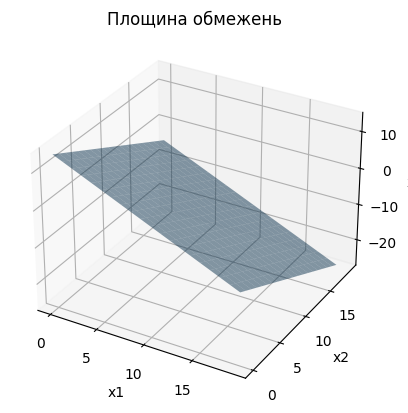

In [8]:
B = 100 # золотих

x1 = np.arange(0, 20)
x2 = np.arange(0, 20)
x1, x2 = np.meshgrid(x1, x2)
x3 = (B - 8*x1 - 7*x2)/7

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1, x2, x3, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("Площина обмежень")

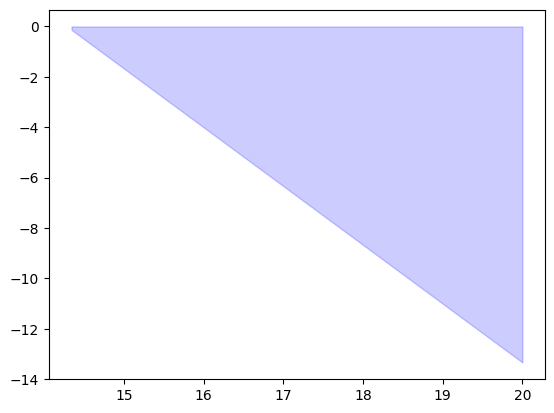

In [6]:
x1 = np.linspace(0, 20, 100)
x21 = (B-5*x1)/2 # За умови що х3=0
x31 = (B-7*x1)/3 # За умови що х2=0

plt.fill_between(x1, x21, 0, where=x21<0, alpha=0.2, color='red')
plt.fill_between(x1, x31, 0, where=x31<0, alpha=0.2, color='blue')

In [9]:
# обертаємо задачу на знаходження мінімуму
c = np.array([18, 31, 9])

# Записуємо матрицю умов (з коефіцієнтів рівнянь)
A = np.array([
    [25, 13, 31]
])

# Записуємо матрицю розвязків
b = np.array([B])

# Записуємо вектор обмежень області значень
bnd = [(0, None), (0, None), (0, None)]

# Знаходимо розвязки задачі
res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)

x1, x2, x3 = res.x
profit = -res.fun

# Результати
print(f"Кількість Міфрилу: {x1}")
print(f"Кількість Опалу: {x2}")
print(f"Кількість Аметисту: {x3}")
print(f"Загальний прибуток: {profit} золотих")

Кількість Міфрилу: 0.0
Кількість Опалу: 7.6923076923076925
Кількість Аметисту: 0.0
Загальний прибуток: 238.46153846153848 золотих
